[EEA 10k grid](https://sdi.eea.europa.eu/datashare/s/qDXsADLCfdBw73Z/download)



In [2]:
import geopandas as gp
from shapely.geometry import Point, LineString
from itertools import combinations
dist_threshold = 50000


In [3]:
grids = gp.read_file("C:/Users/endre/Downloads/eea-ref-grid-no_10_km/no_10km.shp")
obs = gp.read_file("C:/Users/endre/OneDrive/DiverseProsjekt/Data/Edelløvtrær.gpkg")

In [4]:
grids = grids.to_crs(obs.crs)

<Axes: >

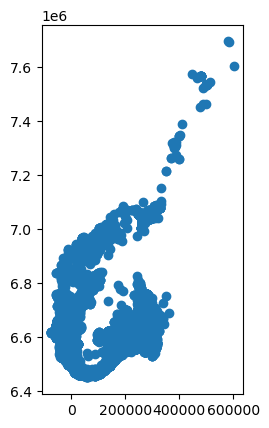

In [5]:
ints = gp.sjoin(obs,grids)
ints.plot()

<Axes: >

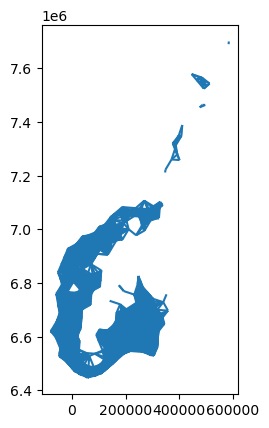

In [6]:
habs = grids[grids["CELLCODE"].isin(ints["CELLCODE"])]
habs_centr = habs.centroid
lines = gp.GeoSeries([LineString([p1, p2]) for p1, p2 in combinations(habs_centr, 2)])
lines = lines[lines.length<dist_threshold]
lines.plot()
#lines = lines.set_crs('epsg:32633')


<Axes: >

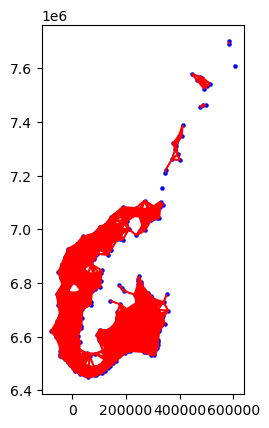

In [7]:
ax = habs_centr.plot(color='blue', marker='o', markersize=5)
lines.plot(ax=ax, color='red')

In [8]:
lines_gdf = gp.GeoDataFrame(geometry=lines, crs=32633)
print(lines_gdf.crs)

EPSG:32633


In [9]:

ints_l = gp.sjoin(lines_gdf,grids)
rangs = grids[grids["CELLCODE"].isin(ints_l["CELLCODE"])]

<Axes: >

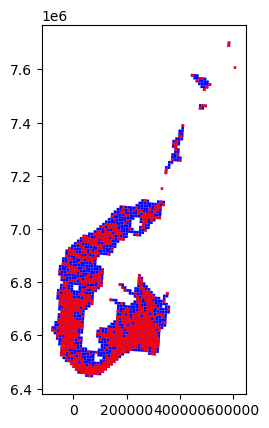

In [10]:
ax = rangs.plot(color='blue', marker='o', markersize=5)
habs.plot(ax=ax, color='red')